Importing used packages

In [143]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from perceptron import Perceptron

Loading the dataset

In [144]:
# Load the dataset
iris = datasets.load_iris()
print(iris.DESCR)

X = pd.DataFrame(iris.data, columns=iris.feature_names)
Y = pd.Series(iris.target) # made of class indexes

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Filtering only the needed data

In [145]:
# getting data about only 2 of the classes
filteredX = X[(Y == 1) | (Y == 2)]
filteredX = filteredX[['sepal length (cm)', 'petal length (cm)']]

filteredY = Y[(Y == 1) | (Y == 2)]
filteredY = filteredY.map({1: -1, 2: 1}) # mapping the class indexes to -1 and 1

# splitting data
x_train, x_val, y_train, y_val = train_test_split(filteredX, filteredY, test_size = 0.25)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.10)

Initializing the perceptron and training it on the given data.

In [158]:
# initializing the perceptron with the number of weights needed
p = Perceptron(filteredX.shape[1])

p.train(x_train.to_numpy(), y_train.to_numpy(), 0.12, 1000)

print("success on test: {}%".format(p.success_rate(x_train.to_numpy(), y_train.to_numpy())))

# print(p.weights)

success on test: 0.9253731343283582%


Validating the training

In [160]:
# print("validation samples:")
for i in range(len(x_val)):
    print("actual:", y_val.iloc[i], "eval:", p.eval(x_val.iloc[i]))
    
print("success on validation: {}%".format(100*p.success_rate(x_val.to_numpy(), y_val.to_numpy())))

actual: -1 eval: 1
actual: 1 eval: 1
actual: -1 eval: -1
actual: 1 eval: 1
actual: 1 eval: 1
actual: 1 eval: 1
actual: 1 eval: -1
actual: -1 eval: -1
actual: 1 eval: 1
actual: -1 eval: -1
actual: -1 eval: -1
actual: -1 eval: -1
actual: 1 eval: -1
actual: 1 eval: -1
actual: 1 eval: -1
actual: 1 eval: 1
actual: -1 eval: -1
actual: 1 eval: 1
actual: 1 eval: 1
actual: 1 eval: 1
actual: 1 eval: 1
actual: 1 eval: 1
actual: -1 eval: -1
actual: 1 eval: 1
actual: 1 eval: 1
success on validation: 80.0%


Showing the results

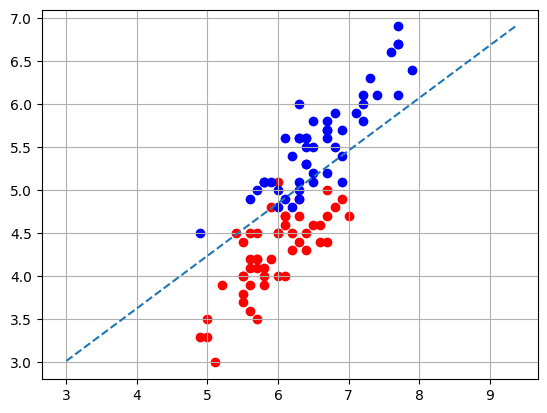

In [161]:
# displaying the data points 
for i in range(filteredX.shape[0]):
    plt.scatter(filteredX.iloc[i, 0], filteredX.iloc[i, 1], color='red' if filteredY.iloc[i] == -1 else 'blue')

# defining the points to plot the line given the weights
# b + w0*x + w1*y = 0
# x = (-b - w1*y)/w0
y_max = filteredX['petal length (cm)'].max()
y_min = filteredX['petal length (cm)'].min()

point1 = [(-p.bias - p.weights[1]*y_max)/p.weights[0], y_max]
point2 = [(-p.bias - p.weights[1]*y_min)/p.weights[0], y_min]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, linestyle="--")
plt.grid()
plt.show()